In [67]:
import pandas as pd

In [68]:
dados = pd.read_csv("dataset_avaliacoes.csv")

In [69]:
dados.value_counts('sentimento')

sentimento
positivo    7890
negativo    7611
Name: count, dtype: int64

In [70]:
from sklearn.feature_extraction.text import CountVectorizer

In [71]:
texto = [
    'comprei um produto ótimo',
    'comprei um produto ruim'
]

vetorizar = CountVectorizer()
bag_of_words = vetorizar.fit_transform(texto)

In [72]:
pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=[vetorizar.get_feature_names_out()])

,comprei,produto,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


In [73]:
vetorizar = CountVectorizer(lowercase=False)
bag_of_words = vetorizar.fit_transform(dados.avaliacao)
print(bag_of_words.shape)

(15501, 23352)


In [74]:
vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(dados.avaliacao)
print(bag_of_words.shape)

(15501, 50)


In [75]:
pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=[vetorizar.get_feature_names_out()])

,Não,Produto,ainda,antes,as,até,bem,bom,chegou,com,...,qualidade,que,recebi,recomendo,se,sem,tem,um,uma,veio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,1,2,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
15497,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
15498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15499,0,1,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
from sklearn.model_selection import train_test_split

x_treino, x_test, y_treino, y_test = train_test_split(bag_of_words, dados.sentimento, random_state=4978)

In [77]:
from sklearn.linear_model import LogisticRegression

regressao_logistica = LogisticRegression()
regressao_logistica.fit(x_treino, y_treino)
acuracia = regressao_logistica.score(x_test, y_test)
print(acuracia)

0.7979876160990712


In [78]:
from wordcloud import WordCloud

In [79]:
todas_palavras = [texto for texto in dados.avaliacao]

In [80]:
todas_palavras = ' '.join([texto for texto in dados.avaliacao])

In [81]:
nuvem_palavras = WordCloud().generate(todas_palavras)

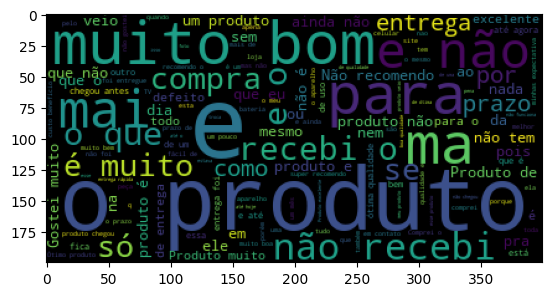

In [82]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(nuvem_palavras)
plt.show()

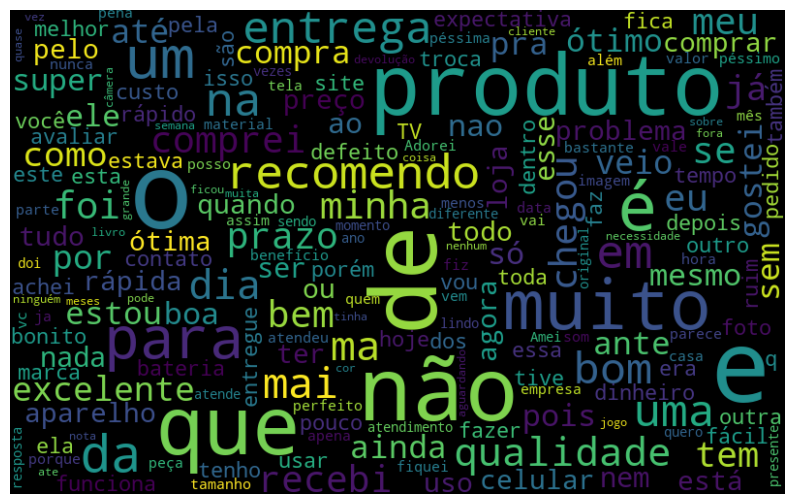

In [83]:
nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)
plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

In [84]:
def nuvem_palavras(texto, coluna_texto, sentimento):
  # Filtrando as resenhas com base no sentimento especificado
  texto_sentimento = texto.query(f"sentimento == '{sentimento}'")[coluna_texto]

  # Unindo todas as resenhas em uma única string
  texto_unido = ' '.join(texto_sentimento)

  # Criando e exibindo a nuvem de palavras
  nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(texto_unido)
  plt.figure(figsize=(10,7))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis('off')
  plt.show()

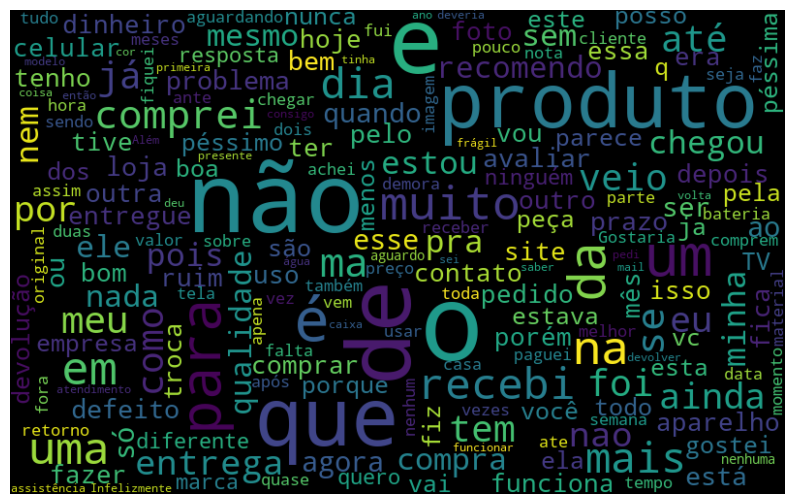

In [85]:
nuvem_palavras(dados, 'avaliacao', 'negativo')

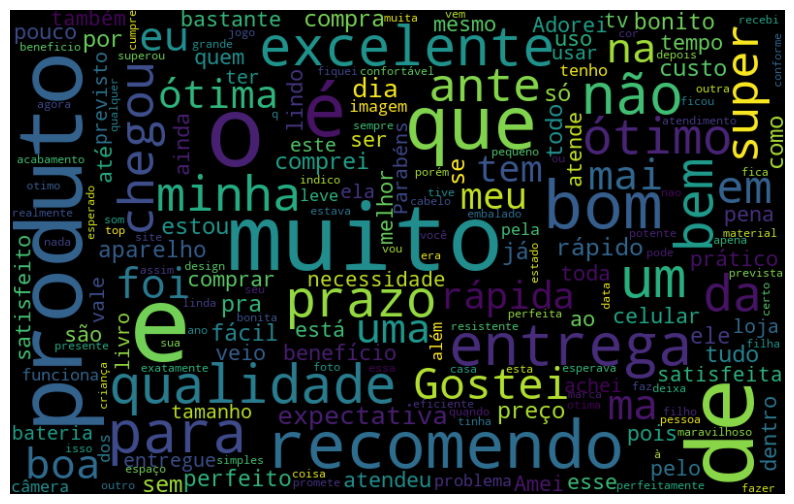

In [86]:
nuvem_palavras(dados, 'avaliacao', 'positivo')

In [87]:
import nltk

nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\leoka\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\leoka\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\leoka\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\leoka\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\leoka\AppData\Roaming\nltk_data...
[

True

In [88]:
frases = [
    'Um produto bom',
    'Um produto ruim'
]

frequencia = nltk.FreqDist(frases)
frequencia

FreqDist({'Um produto bom': 1, 'Um produto ruim': 1})

In [89]:
from nltk import tokenize

frase = 'O produto é excelente e a entrega foi muito rápida!'

token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
print(token_frase)

['O', 'produto', 'é', 'excelente', 'e', 'a', 'entrega', 'foi', 'muito', 'rápida!']


In [90]:
token_frase = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)
frequencia

FreqDist({'e': 11813, 'o': 10865, 'de': 10280, 'a': 8873, 'que': 7657, 'não': 7286, 'é': 4786, 'produto': 4765, 'com': 4641, 'do': 4583, ...})

In [91]:
df_frequencia = pd.DataFrame({
    'palavra': list(frequencia.keys()),
    'frequencia': list(frequencia.values())
})

df_frequencia.nlargest(columns='frequencia', n=10)

,palavra,frequencia
8,e,11813
6,o,10865
29,de,10280
19,a,8873
46,que,7657
22,não,7286
163,é,4786
63,produto,4765
177,com,4641
130,do,4583


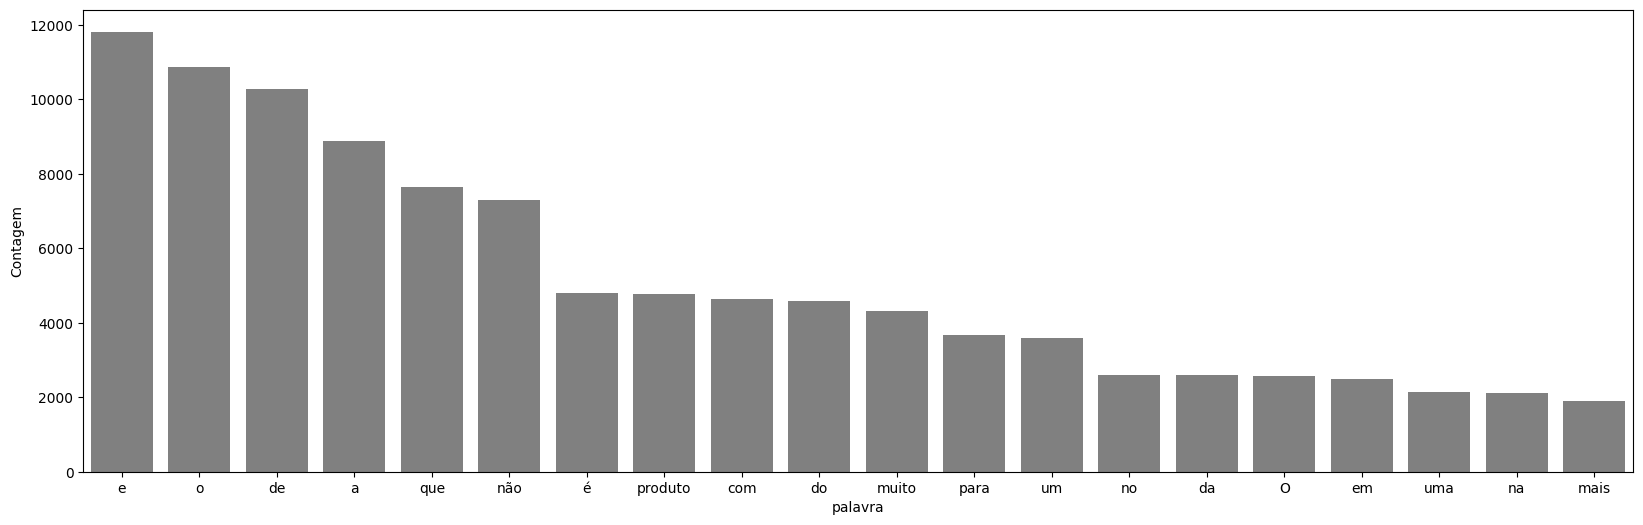

In [92]:
import seaborn as sns

plt.figure(figsize=(20,6))
ax = sns.barplot(data=df_frequencia.nlargest(columns='frequencia', n=20), x='palavra', y='frequencia', color='gray')
ax.set(ylabel='Contagem')
plt.show()

In [93]:
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')

In [94]:
frase_processada = []

for opiniao in dados['avaliacao']:
    palavras_texto = token_espaco.tokenize(opiniao)
    nova_frase = [palavra for palavra in palavras_texto if palavra not in palavras_irrelevantes]
    frase_processada.append(' '.join(nova_frase))
    
dados['tratamento_1'] = frase_processada

In [95]:
dados.head()

,ID_avaliacao,avaliacao,nota,sentimento,tratamento_1
0,81841,"Esse smartphone superou minhas expectativas, r...",5,positivo,"Esse smartphone superou expectativas, recomendo"
1,28031,o cheiro e muito desagradavel!! pra quem se in...,2,negativo,cheiro desagradavel!! pra incomoda nao recomen...
2,91332,"Eu fiz a compra a loja não entregou o produto,...",1,negativo,"Eu fiz compra loja entregou produto, compra fe..."
3,110045,"Atendeu minhas expectativas, só achei a luz ru...",4,positivo,"Atendeu expectativas, achei luz ruim, nada dif..."
4,36929,"Gostei muito, só achei que ficou a desejar a q...",5,positivo,"Gostei muito, achei ficou desejar qualidade fo..."


In [96]:
dados['avaliacao'][0]

'Esse smartphone superou minhas expectativas, recomendo'

In [97]:
dados['tratamento_1'][0]

'Esse smartphone superou expectativas, recomendo'

In [98]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    X_treino, X_teste, y_treino, y_teste = train_test_split(bag_of_words, texto[coluna_classificacao], random_state=4978)
    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(X_treino, y_treino)
    acuracia = regressao_logistica.score(X_teste, y_teste)
    return print(f"Acurácia do modelo com '{coluna_texto}': {acuracia * 100:.2f}%")

In [99]:
classificar_texto(dados, 'tratamento_1', 'sentimento')

Acurácia do modelo com 'tratamento_1': 81.14%


In [100]:
def grafico_frequencia(texto, coluna_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    token_espaco = tokenize.WhitespaceTokenizer()
    frequencia = nltk.FreqDist(token_espaco.tokenize(todas_palavras))
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),                                 "Frequência": list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns="Frequência", n=quantidade)
    plt.figure(figsize=(20,6))
    ax = sns.barplot(data=df_frequencia, x="Palavra", y ="Frequência", color='gray')
    ax.set(ylabel="Contagem")
    plt.show()

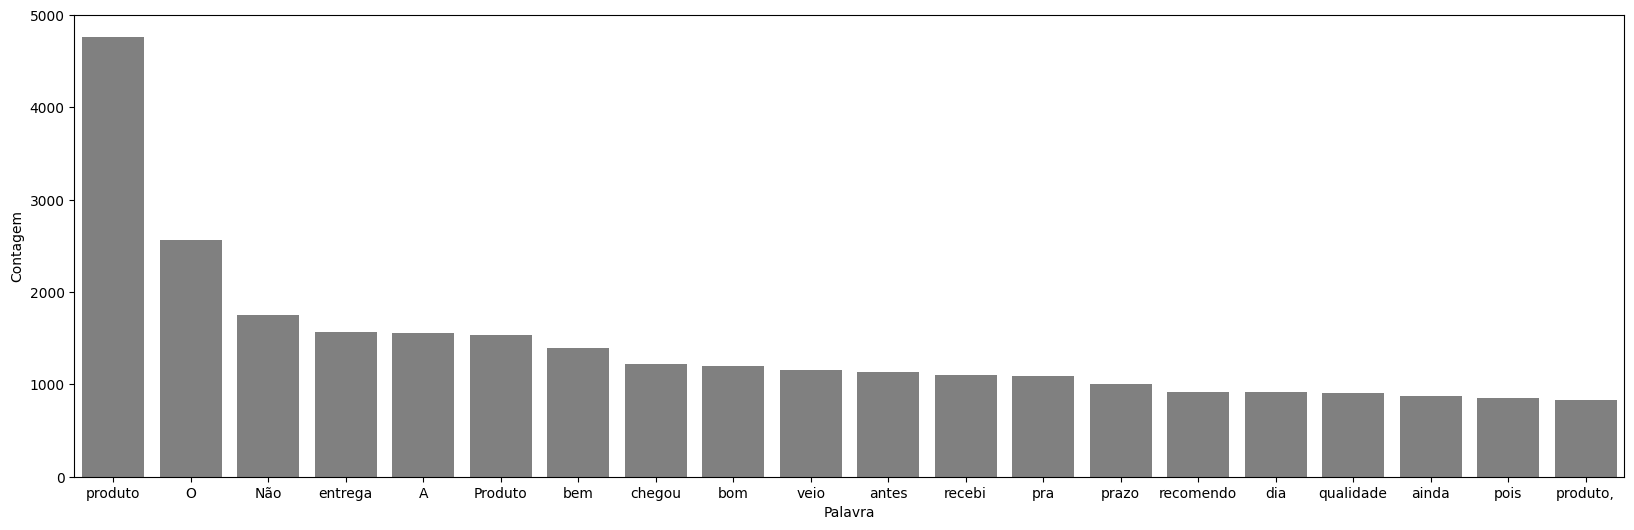

In [101]:
grafico_frequencia(dados, 'tratamento_1', 20)

In [102]:
frase = 'Esse smartphone superou expectativas, recomendo'

token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)
print(token_frase)

['Esse', 'smartphone', 'superou', 'expectativas', ',', 'recomendo']


In [103]:
frase_processada = []

for opiniao in dados['tratamento_1']:
    palavras_texto = token_pontuacao.tokenize(opiniao)
    nova_frase = [palavra for palavra in palavras_texto if palavra.isalpha() and palavra not in palavras_irrelevantes]
    frase_processada.append(' '.join(nova_frase))

dados['tratamento_2'] = frase_processada

In [104]:
dados.head()

,ID_avaliacao,avaliacao,nota,sentimento,tratamento_1,tratamento_2
0,81841,"Esse smartphone superou minhas expectativas, r...",5,positivo,"Esse smartphone superou expectativas, recomendo",Esse smartphone superou expectativas recomendo
1,28031,o cheiro e muito desagradavel!! pra quem se in...,2,negativo,cheiro desagradavel!! pra incomoda nao recomen...,cheiro desagradavel pra incomoda nao recomendoo
2,91332,"Eu fiz a compra a loja não entregou o produto,...",1,negativo,"Eu fiz compra loja entregou produto, compra fe...",Eu fiz compra loja entregou produto compra fei...
3,110045,"Atendeu minhas expectativas, só achei a luz ru...",4,positivo,"Atendeu expectativas, achei luz ruim, nada dif...",Atendeu expectativas achei luz ruim nada dific...
4,36929,"Gostei muito, só achei que ficou a desejar a q...",5,positivo,"Gostei muito, achei ficou desejar qualidade fo...",Gostei achei ficou desejar qualidade fotos Ach...


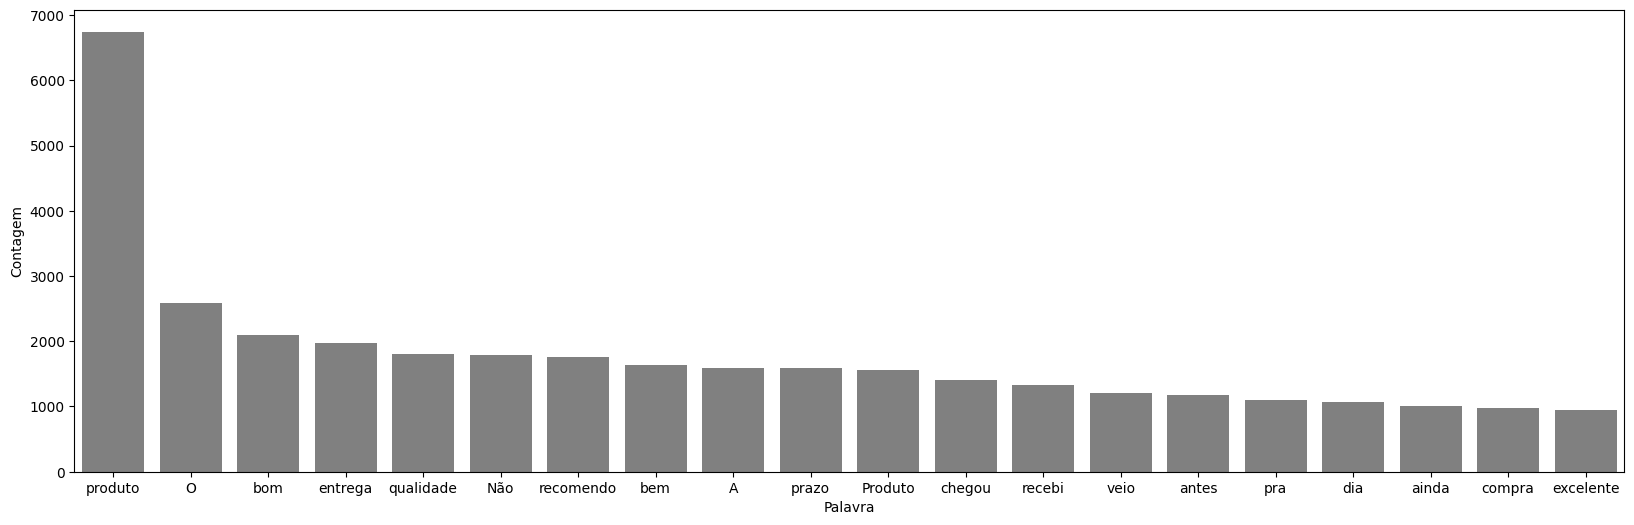

In [105]:
grafico_frequencia(dados, 'tratamento_2', 20)

In [106]:
import unidecode

In [107]:
sem_acentos = [unidecode.unidecode(texto) for texto in dados['tratamento_2']]

In [108]:
stopwords_sem_acento = [unidecode.unidecode(texto) for texto in palavras_irrelevantes]

In [109]:
dados['tratamento_3'] = sem_acentos

frase_processada = []

for opiniao in dados['tratamento_3']:
    palavras_texto = token_pontuacao.tokenize(opiniao)
    nova_frase = [palavra for palavra in palavras_texto if palavra not in stopwords_sem_acento]
    frase_processada.append(' '.join(nova_frase))

dados['tratamento_3'] = frase_processada

In [110]:
dados['tratamento_2'][70]

'Melhor compra fiz últimos tempos Produto barato útil Produto robusto leve O teclado proporciona digitação confortável mouse preciso O teclado mouse usam apenas receptor economizando número portas USB computador Me livrei incomodo fios espaço trabalho ficou limpo harmonioso Ademais tudo parece bastante durável safisfeito Recomendo todos'

In [111]:
dados['tratamento_3'][70]

'Melhor compra fiz ultimos tempos Produto barato util Produto robusto leve O teclado proporciona digitacao confortavel mouse preciso O teclado mouse usam apenas receptor economizando numero portas USB computador Me livrei incomodo fios espaco trabalho ficou limpo harmonioso Ademais tudo parece bastante duravel safisfeito Recomendo todos'

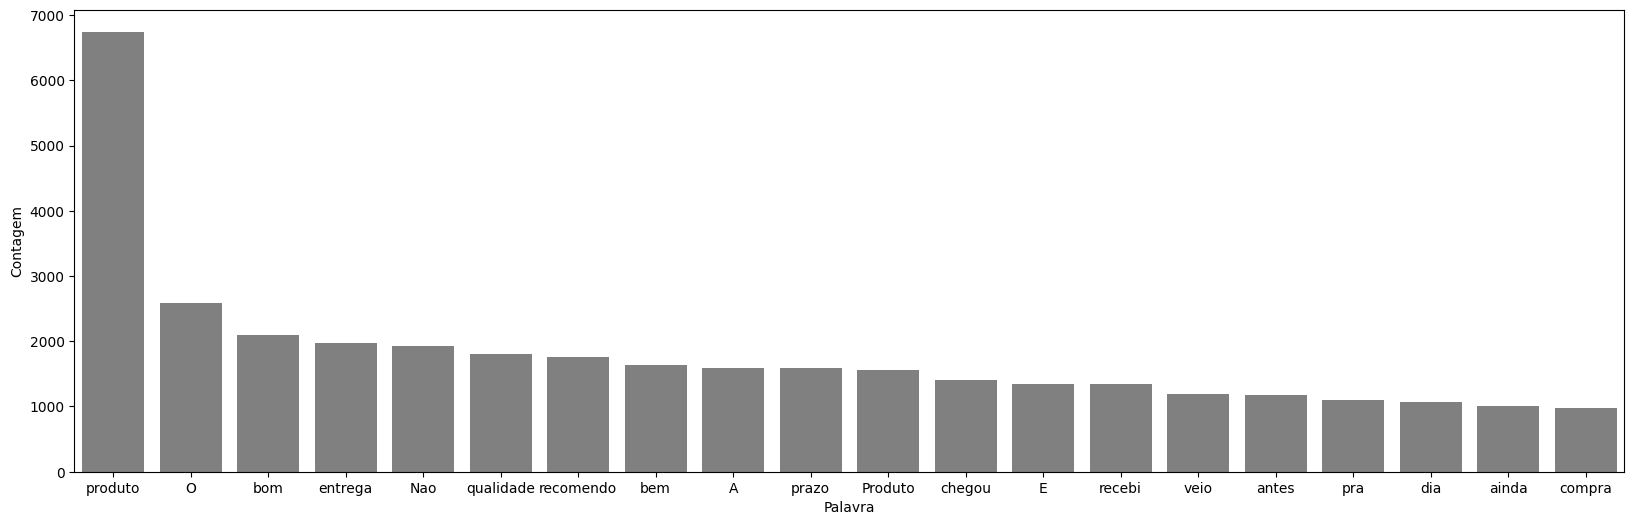

In [112]:
grafico_frequencia(dados, 'tratamento_3', 20)

In [113]:
frase_processada = []

for opiniao in dados['tratamento_3']:
    opiniao = opiniao.lower()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    nova_frase = [palavra for palavra in palavras_texto if palavra not in stopwords_sem_acento]
    frase_processada.append(' '.join(nova_frase))

dados['tratamento_4'] = frase_processada

In [114]:
classificar_texto(dados, 'tratamento_4', 'sentimento')

Acurácia do modelo com 'tratamento_4': 83.77%


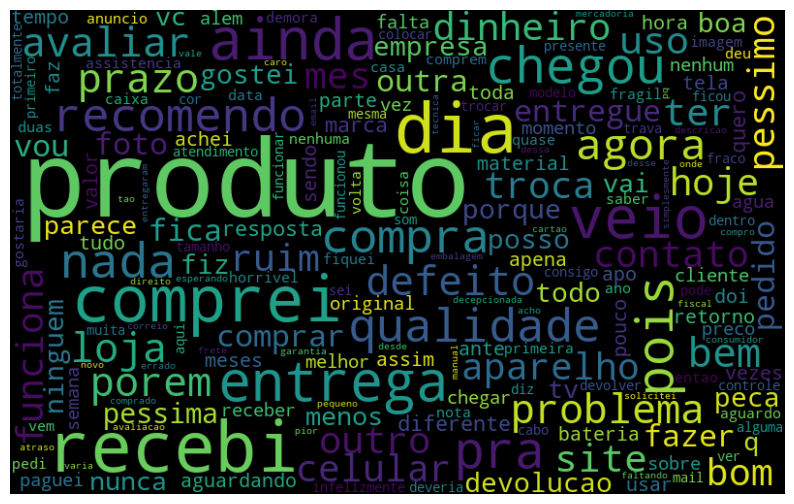

In [115]:
nuvem_palavras(dados, 'tratamento_4', 'negativo')

In [116]:
stemmer = nltk.RSLPStemmer()

In [117]:
frase_processada = []
for opinion in dados["tratamento_4"]:
    palavras_texto = token_pontuacao.tokenize(opinion)
    nova_frase = [stemmer.stem(palavra) for palavra in palavras_texto]
    frase_processada.append(" ".join(nova_frase))

dados["tratamento_5"] = frase_processada

In [118]:
classificar_texto(dados, 'tratamento_5', 'sentimento')

Acurácia do modelo com 'tratamento_5': 85.09%


In [119]:
from sklearn.feature_extraction.text import TfidfVectorizer

frases = ['Comprei um ótimo produto', 'Comprei um produto péssimo']

tfidf = TfidfVectorizer(lowercase=False, max_features=50)
matriz = tfidf.fit_transform(frases)

import pandas as pd
pd.DataFrame(matriz.todense(), columns=tfidf.get_feature_names_out())


,Comprei,produto,péssimo,um,ótimo
0,0.448321,0.448321,0.000000,0.448321,0.630099
1,0.448321,0.448321,0.630099,0.448321,0.000000


In [120]:
tfidf_bruto = tfidf.fit_transform(dados["avaliacao"])
X_treino, X_teste, y_treino, y_teste = train_test_split(tfidf_bruto, dados["sentimento"], random_state=4978)
regressao_logistica.fit(x_treino, y_treino)
acuracia_tfidf_bruto = regressao_logistica.score(X_teste, y_teste)
print(f"Acurácia do modelo: {acuracia_tfidf_bruto *100:.2f}%")

Acurácia do modelo: 73.53%


In [121]:
tfidf_tratados = tfidf.fit_transform(dados['tratamento_5'])
X_treino, X_teste, y_treino, y_teste = train_test_split(tfidf_tratados, dados['sentimento'], random_state=4978)
regressao_logistica.fit(X_treino, y_treino)
acuracia_tfidf_tratados = regressao_logistica.score(X_teste, y_teste)
print(f'Acurácia do modelo: {acuracia_tfidf_tratados *100:.2f}%')

Acurácia do modelo: 85.17%


In [122]:
from nltk import ngrams

frase = 'Comprei um produto ótimo'
frase_separada = token_espaco.tokenize(frase)
pares = ngrams(frase_separada, 2)
list(pares)

[('Comprei', 'um'), ('um', 'produto'), ('produto', 'ótimo')]

In [123]:
tfidf_50 = TfidfVectorizer(lowercase=False, max_features=50, ngram_range=(1,2))
vetor_tfidf = tfidf_50.fit_transform(dados['tratamento_5'])
X_treino, X_teste, y_treino, y_teste = train_test_split(vetor_tfidf, dados['sentimento'], random_state=4978)
regressao_logistica.fit(X_treino, y_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(X_teste, y_teste)
print(f'Acurácia do modelo com 50 features e ngrams: {acuracia_tfidf_ngrams * 100:.2f}%')

Acurácia do modelo com 50 features e ngrams: 85.19%


In [124]:
tfidf_100 = TfidfVectorizer(lowercase=False, max_features=100, ngram_range=(1,2))
vetor_tfidf = tfidf_100.fit_transform(dados['tratamento_5'])
X_treino, X_teste, y_treino, y_teste = train_test_split(vetor_tfidf, dados['sentimento'], random_state=4978)
regressao_logistica.fit(X_treino, y_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(X_teste, y_teste)
print(f'Acurácia do modelo com 100 features e ngrams: {acuracia_tfidf_ngrams * 100:.2f}%')

Acurácia do modelo com 100 features e ngrams: 88.18%


In [128]:
tfidf = TfidfVectorizer(lowercase=False, ngram_range=(1,2))
vetor_tfidf = tfidf.fit_transform(dados['tratamento_5'])
X_treino, X_teste, y_treino, y_teste = train_test_split(vetor_tfidf, dados['sentimento'], random_state=4978)
regressao_logistica.fit(X_treino, y_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(X_teste, y_teste)
print(f'Acurácia do modelo com todas features e ngrams: {acuracia_tfidf_ngrams * 100:.2f}%')

Acurácia do modelo com todas features e ngrams: 91.80%


In [130]:
tfidf_1000 = TfidfVectorizer(lowercase=False, max_features=1000, ngram_range=(1,2))
vetor_tfidf = tfidf_1000.fit_transform(dados['tratamento_5'])
X_treino, X_teste, y_treino, y_teste = train_test_split(vetor_tfidf, dados['sentimento'], random_state=4978)
regressao_logistica.fit(X_treino, y_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(X_teste, y_teste)
print(f'Acurácia do modelo com 1000 features e ngrams: {acuracia_tfidf_ngrams * 100:.2f}%')

Acurácia do modelo com 1000 features e ngrams: 91.74%


In [131]:
pesos = pd.DataFrame(
    regressao_logistica.coef_[0].T,
    index=tfidf_1000.get_feature_names_out()
)

In [133]:
pesos.nlargest(50, 0)

,0
otim,7.888543
excel,7.521533
bom,5.950559
perfeit,5.054339
ador,4.966444
satisfeit,4.720741
rap,4.256273
lind,3.710143
ame,3.441914
maravilh,3.407360


In [134]:
pesos.nsmallest(50, 0)

,0
pess,-4.620537
receb,-4.053516
ruim,-4.037027
frac,-3.638184
horri,-3.333023
defeit,-3.042722
fragil,-3.005967
decepcion,-2.896466
devolv,-2.852533
vei,-2.650762
